# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [11]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 1
MESSAGE_BOUND = 1000

In [12]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [13]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
final_data_laugh = {}
final_data_dayofweek = {}
invalid_message_count = 0

In [14]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 615 chats...
Hoco_ru9lLxvGAA
2ndlunchmarch10_9abxiify0q
patrickkeene_hyylj8p-ma
abeerahsid_bev4pqfo8q
balloonfrvrinstant_c4igagdn4w
annetoinetteleannzuhairand2others_2l3_8hdylq
Hydrogels_ys3U5ypQpw
aaronvrundjessieand8others_zdhj3umfha
jessicahofflich_uzaov8375g
APResearchSurveyD_fQ6dhJRqBQ
derekanddiana_i7mdm13otw
AshleySu_m5ZpprdVgA
ericli_qsb_6g05fw
Oct15BirthdayParty_iG-Vsb_Wqg
gwenbui_jpqyovnpea
superlazydebaters_ntxfidtsgw
henrysun_zi0jivzerw
jenniferericjessieandvidhu_bmzwfje0xq
annabellechu_mwp3l4n9yw
microbemissionscienceolympiad_hdqvkceqma
AlexJessieOliviaandJames_YADN0l0y9A
Englishcrimescenesassignment_9pQC8TZNDQ
EricYuan_pWCgxtDwsg
stephanbui_eskkpksklg
experimentaldesignscienceolympiad_g59iyp0keq
hydrogeofam_0-qunlddgg
18thBirthdaybois_X4z392qrkQ
BrennanFerrington_OUkDPfZDzw
ashishscrocs_ies5momabg
matthewshen_eryeyx-sow
VrundAlexAshishand3others_H45KwI5Hig
KimmyLi_s0NLj0iwmQ
JayAshishandSimran_xSTbFtt2SQ
kiansamra_lht681reiw
Millerbootycall_jQokxDt3WQ
ShreyasIye

MemeQueens_v_aWzZqxfQ
simranandjames_n9yvhdk26q
JoonYoungLee_MF1BdeqP_A
VrundJessieAshishand3others_5z-ujsPPEQ
k8vYNmncYA
annetoinettesharvariaaronandsahan_jidv015b8g
GinaChanelJenniferand33others_9Z_ad5Ln_g
simonvrundalexand4others_3kykj5iqsg
hermanezraginaand19others_wsn5nsrtxa
junfeiye_w_okf685ka
annetoinettesharvarileannandsimran_zsqodzytla
dexterlai_ka7g0mlwsw
ethanho_bl8zpt_xha
BSTBestSoccerTeamJV_ejSmDOL4Ow
JeffLuo_lcpL983GRQ
amandayang_orbyksji7q
ChanelVrundEricand2others_wP8VLntDJQ
Hydrosex_5xdAaB1BFw
christopherhambacher_usu3urjc-g
meganyoung_p1ilqeiuka
chrisvrundandsimran_ivilxl1rlw
annetoinettesharvarileannandsimran_8pjjuq836g
YouguysaremyWORLD_jlNnndTESA
JAVVA_kSx13HT0MQ
kaichang_kbdtumkcfw
ShadmanKabir_GjInjzSiUg
MegLeiliAmyand6others_KkngRt2lrw
chloekim_eycdhn8m0a
vrundericsimranandvidhu_ql0-pwrcra
september8firstluncheven_bpfw4m5hxw
evanwrote_wl490dcfhq
jessicarosario_l3zncgz8kq
anikpatel_u1blu_nqta
AlbertSteveElizabethand6others_g79GeAyZrw
VrundKrishSimranand2others_B5

In [37]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}
    laugh_meter = {}
    number_each_day = {"Mon":0,"Tues":0,"Wed":0,"Thurs":0,"Fri":0,"Sat":0,"Sun":0}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"].lower()
            day = datetime.datetime.fromtimestamp(time/1000.0).weekday()
            if day == 0:
                day = "Mon"
            if day == 1:
                day = "Tues"
            if day == 2:
                day = "Wed"
            if day == 3:
                day = "Thurs"
            if day == 4:
                day = "Fri"
            if day == 5:
                day = "Sat"
            if day == 6:
                day = "Sun"
            
            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
            
            laugh_meter[name] = laugh_meter.get(name, 0)
            laugh_meter[name] += message_content.count("lol")
            laugh_meter[name] += message_content.count("lmao")
            laugh_meter[name] += message_content.count("lmfao")
            laugh_meter[name] += message_content.count("lel")
            laugh_meter[name] += message_content.count("lul")
            
            number_each_day[day] = number_each_day.get(day, 0)
            number_each_day[day] += 1
                             
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words
    final_data_laugh[i] = laugh_meter
    final_data_dayofweek[i] = number_each_day
    

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 960 messages - AnnetoinetteFigueroa_6nun0gnoZg
1 - 902 messages - ClarkSOHelicopters_09lNF_kJCw
2 - 883 messages - HermanWu_NVuWobg4mQ
3 - 877 messages - TheCabinet_QrgvL-tt4Q
4 - 844 messages - LyleCarrera_hdr0Ketgqw
5 - 827 messages - ClarkSOOfficerBoard_GJKXTAgrGA
6 - 791 messages - CaitlynTran_E7m7llIuAg
7 - 752 messages - VincentPan_wUEmgpG8dA
8 - 738 messages - VidhuRamakrishnan_bDFfsnGFwg
9 - 731 messages - Prom2k17_plzdEFoO8g
10 - 699 messages - prom_zwAwOkohvA
11 - 695 messages - GarciaGroup7_onGaNd2pcA
12 - 693 messages - VrundAshishKrishand4others_5SJsPlH09Q
13 - 687 messages - AlexSimranEvanand2others__vqKhN6mmQ
14 - 685 messages - APUSHGroupLessonProject_lJUK2zSVHw
15 - 672 messages - SaveScienceO_n0QR0II4wQ
16 - 648 messages - KevinMeng_pnUGkrliVg
17 - 639 messages - winklers_mfTiipr6Aw
18 - 635 messages - JoonYoungBenjaminShreyasandKevin_n6BNwzq31Q
19 - 630 messages - ScienceOINC_Ts3LkEFEpQ
20 - 628 messages - VrundAlexJessieand3others__c0pOo0xDw
21 - 624 messages - 

194 - 56 messages - GinaChanelKatieand10others_QZmFouaC1Q
195 - 55 messages - chaneljenniferchrisand25others_xjtx3vyvgw
196 - 55 messages - ClarkSOGameOn_RPmtohjbzA
197 - 54 messages - jennifervrundericandjessie_okpgs4ojaq
198 - 53 messages - calebdrewes_lmpank0thg
199 - 53 messages - ZuhairLateef_mkzv15_zfg
200 - 51 messages - michellerachelannetoinetteand6others_t9llv9ec0g
201 - 51 messages - ishansaran_csniss8rqa
202 - 51 messages - AlexJessieOliviaandJames_YADN0l0y9A
203 - 50 messages - biancamoazez_dhubkxf9uw
204 - 50 messages - JeffryYoon_RU-Zw2r1aA
205 - 50 messages - GinaChanelJenniferand33others_9Z_ad5Ln_g
206 - 49 messages - felixzhan_x2ebv-ppgw
207 - 49 messages - RachelSharvariJenniferand3others_fQVfm4vbPg
208 - 49 messages - CHINESEProject_6TDrxdQvXA
209 - 49 messages - AustinPark_Xz_jxA6XRA
210 - 48 messages - thomaslim_9frjzdwxyg
211 - 48 messages - kevinchen_z-gdquqhwq
212 - 48 messages - hermansharvarialishaand2others_gcsu8t35bg
213 - 48 messages - ashishscrocs_ies5mom

In [40]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.xlabel('Person')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.xlabel('Person')
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()

def plot_histogram_laughter(chat_number):
    plotted_data = final_data_laugh[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Laughter Meter')
    pl.xlabel('Person')
    pl.ylabel('Number of Laughing Acronyms')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_dayofweek(chat_number):
    plotted_data = final_data_dayofweek[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Messages on Day of Week')
    pl.ylabel('Number of Messages')
    pl.xlabel('Day of Week')
    pl.tight_layout()
    pl.show()

def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    plot_histogram_laughter(chat_number)
    plot_histogram_dayofweek(chat_number)

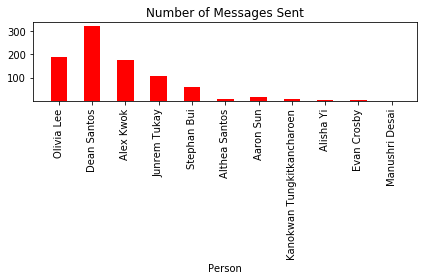

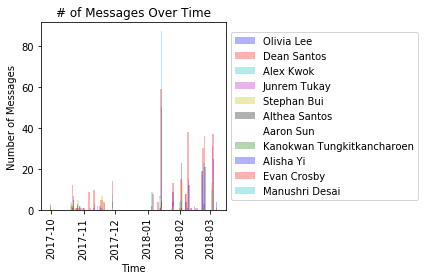

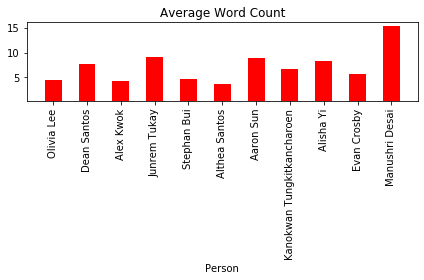

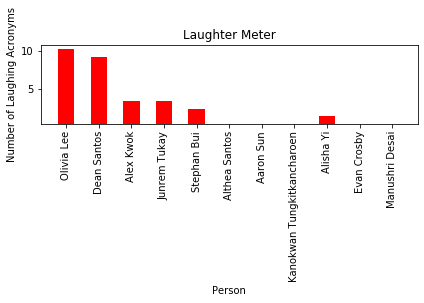

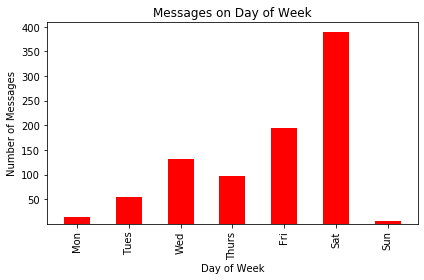

In [42]:
plot(1)